# Importing the necessary libraries

In [453]:
#imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from statsmodels.formula.api import ols

# Loading the dataset

In [454]:
# Loading the data

df = pd.read_csv("/Users/madservices/Documents/FlatIron/dsc-data-science-env-config/Phase_2/Phase-2-Group-17-Project/data/kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [455]:
# Calculating the period the dataset covers
start_date = df['date'].min()
end_date = df['date'].max()
print(start_date, end_date)

1/10/2015 9/9/2014


The data covers a period of one year from Sep 2014 to Oct 2015.

# Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## Checking the dataset

In [456]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [457]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [458]:
#Handling missing values.
#Identify whether the data set has missing values.
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

# Data Cleaning

In [459]:
df['waterfront'].unique()

array([nan,  0.,  1.])

The above code shows that the values for the waterfront column are 0 and 1 which means of a house has a waterfront its value is 1 otherwise it is 0. With this understanding I will fill the missing values with 0s.

In [460]:
df['waterfront'] = df['waterfront'].fillna(0)

In [461]:
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

According to the output of the code above the view column is a descriptin of some quality ranging from 0 to 4. Here as well I choose to assume that the nan values are 0 and therefore replace them wit 0s.

In [462]:
df['view'] = df['view'].fillna(0)

In [463]:
# check the year renovated column to learn about the values and decide what to do with the missing ones.

df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

Here also the column shows the year a house was renovated if it was ever renovated. 0 represents that the house was never renovated. Since the nan values dont specify any year, I assume that the houses with the nan values were never renovated and therefore replace the nan values with 0s.

In [464]:
df['yr_renovated'] = df['yr_renovated'].fillna(0)

In [465]:
# Asserting that there are no missing values in our dataset
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [466]:
# Rechecking the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [467]:
# Changing the datatype of the date column to datetime64[ns]
df['date'] = pd.to_datetime(df['date'])

In [468]:
# Checking the columns' data types
print(df.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront              float64
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement            object
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


In [469]:
# Checking the first 5 entries of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [470]:
df['id'].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

In [471]:
ids = df["id"]
df[ids.isin(ids[ids.duplicated()])].sort_values("id")

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
2495,1000102,2015-04-22,300000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
2494,1000102,2014-09-16,280000.0,6,3.00,2400,9373,2.0,0.0,0.0,...,7,2400,0.0,1991,0.0,98002,47.3262,-122.214,2060,7316
16800,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
16801,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0.0,0.0,...,6,840,0.0,1925,0.0,98055,47.4840,-122.211,1480,6969
11422,109200390,2014-10-20,250000.0,3,1.75,1480,3900,1.0,0.0,0.0,...,7,1480,0.0,1980,0.0,98023,47.2977,-122.367,1830,6956
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6339,9828200460,2014-06-27,260000.0,2,1.00,700,4800,1.0,0.0,0.0,...,7,700,0.0,1922,0.0,98122,47.6147,-122.300,1440,4800
15186,9834200305,2015-02-10,615000.0,3,1.00,1790,3876,1.5,0.0,0.0,...,7,1090,700.0,1904,0.0,98144,47.5750,-122.288,1360,4080
15185,9834200305,2014-07-16,350000.0,3,1.00,1790,3876,1.5,0.0,0.0,...,7,1090,?,1904,0.0,98144,47.5750,-122.288,1360,4080
1084,9834200885,2014-07-17,360000.0,4,2.50,2080,4080,1.0,0.0,0.0,...,7,1040,1040.0,1962,0.0,98144,47.5720,-122.290,1340,4080


It looks like there are some duplicates in the dataset. Need for further investigation.

In [472]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21597, dtype: bool

Here the code returns "False" and it contradicts with the above code. What could be the reason?

In [473]:
# Check for duplicated houses 

#Function to get the number of duplictes
def get_duplicates(df):
    df=df[df.duplicated(keep=False)]
    return df

# Get duplicates
duplicates = get_duplicates(df)
duplicates.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [474]:
#checking unique identifiers for houses. I am assuming that the 'id' column is unique, so let's check that out.
df["id"].value_counts()

id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64

I see that some IDs are used multiple times and this needs further investigation.

In [475]:
# Investigating the 795000620 ID unique identifier. 
df[df["id"]==795000620]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17588,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17589,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250
17590,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0.0,0.0,...,5,1080,0.0,1950,0.0,98168,47.5045,-122.33,1070,6250


This reveals that some houses have been sold multiple times. For instance the house with ID 795000620 has been sold 3 times over the period. This explains the repetition of some of the IDs in this dataset.

In [476]:
# Checking how many houses have been sold multiple times.
houses_sold_more_than_1times =len(df["id"])-len(df["id"].value_counts())
houses_sold_more_than_1times

177

So in this data set there are 177 houses that have been sold more than once during the given period. This confirms that there are no duplicates in the dataset as demonstrated above.

In [477]:
# Checking for values that look like placeholders or are exaggerated.
def extraneous_values(df):
    for col in df.columns:
        print(col, '\n', df[col].value_counts(normalize=True), '\n')


# Apply the function to the housing dataset
extraneous_values(df)


id 
 id
795000620     0.000139
8910500150    0.000093
7409700215    0.000093
1995200200    0.000093
9211500620    0.000093
                ...   
3649100387    0.000046
2767603649    0.000046
1446403617    0.000046
5602000275    0.000046
1523300157    0.000046
Name: proportion, Length: 21420, dtype: float64 

date 
 date
2014-06-23    0.006575
2014-06-25    0.006066
2014-06-26    0.006066
2014-07-08    0.005880
2015-04-27    0.005834
                ...   
2014-11-02    0.000046
2015-01-31    0.000046
2015-05-24    0.000046
2014-05-17    0.000046
2014-07-27    0.000046
Name: proportion, Length: 372, dtype: float64 

price 
 price
450000.0    0.007964
350000.0    0.007964
550000.0    0.007362
500000.0    0.007038
425000.0    0.006945
              ...   
278800.0    0.000046
439888.0    0.000046
354901.0    0.000046
942000.0    0.000046
402101.0    0.000046
Name: proportion, Length: 3622, dtype: float64 

bedrooms 
 bedrooms
3     0.454878
4     0.318655
2     0.127796
5     0.074131
6 

There seems to be one problem with the "bedrooms" column as there is an entry for 33 bedrooms. In addition the "sqft_basement" column contains a non numeric value '?'.

In [478]:
# creating a variable to hold the dataframe with sqft basement with a datatype of float
df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors="coerce")

# Checking column datatype
print(f"datatype for column:", df["sqft_basement"].dtype)

datatype for column: float64


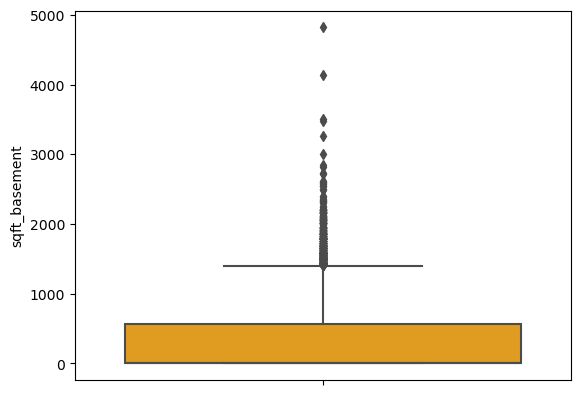

In [479]:
#Quick plot to check for outliers in the data set
sns.boxplot(y=df['sqft_basement'],color="orange");

I need to replace the non-numeric characters with numbers for further processing. I decide to fill it with the median value as the median value is the value less affected by the outliers.

In [480]:
# Calculating the median value for the 'sqft_basement' column.
median_value = df['sqft_basement'].median()

# Replacing the non_numeric value with the median value
df['sqft_basement'] = df['sqft_basement'].replace('?', median_value)

In [481]:
df['sqft_basement'].value_counts()

sqft_basement
0.0       12826
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
1920.0        1
3480.0        1
2730.0        1
2720.0        1
248.0         1
Name: count, Length: 303, dtype: int64

In [482]:
# Checking the values in the 'bedrooms'column
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [483]:
# Let's see closely at the 33 bedrooms entry and investigate
df[df["bedrooms"]==33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [484]:
# Comparing this row with the 10 bedrooms row.
df[df["bedrooms"]==10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13301,627300145,2014-08-14,1150000.0,10,5.25,4590,10920,1.0,0.0,2.0,...,9,2500,2090.0,2008,0.0,98004,47.5861,-122.113,2730,10400
15147,5566100170,2014-10-29,650000.0,10,2.00,3610,11914,2.0,0.0,0.0,...,7,3010,600.0,1958,0.0,98006,47.5705,-122.175,2040,11914
19239,8812401450,2014-12-29,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,...,7,1860,1060.0,1913,0.0,98105,47.6635,-122.320,1810,3745


Taking this comparison to consideration it is evident that the 33 bedrooms row is a mistake. So I chose to drop that entry from the dataset.

In [485]:
df.drop([15856], axis = 0, inplace=True)

In [486]:
# Confirming that I dropped wrong 33 bedrooms entry.
df["bedrooms"].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [487]:
df['waterfront'].fillna(0, inplace=True)
df['waterfront'] = df['waterfront'].astype('int')
df['waterfront'] = df['waterfront'].map({1: True, 0: False})
df['waterfront'].value_counts()

/var/folders/m7/31mld3hn46s_y1f05nhxt1_c0000gn/T/ipykernel_56498/310655529.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['waterfront'].fillna(0, inplace=True)


waterfront
False    21450
True       146
Name: count, dtype: int64

In [488]:
# Adding a column "house_age" that takes the yr_built and the date and returns the difference.

df['house_age'] = df['date'].dt.year - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,False,0.0,...,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,False,0.0,...,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,False,0.0,...,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,False,0.0,...,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,False,0.0,...,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,28


In [489]:
df['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
Name: count, dtype: int64

In [490]:

# # Changing the datatype of the sqft_basement column to numeric
# df['sqft_basement'] = pd.to_numeric(df['sqft_basement'], errors='coerce')

# Changing all the data type to float
# df['bedrooms'] = df['bedrooms'].astype(float)
# df['sqft_living'] = df['sqft_living'].astype(float)
# df['sqft_lot'] = df['sqft_lot'].astype(float)
# df['condition'] = df['condition'].astype(float)
# df['grade'] = df['grade'].astype(float)
# df['sqft_above'] = df['sqft_above'].astype(float)
# df['sqft_basement'] = df['sqft_basement'].astype(float)
# df['yr_built'] = df['yr_built'].astype(float)
# df['zipcode'] = df['zipcode'].astype(float)
# df['sqft_living15'] = df['sqft_living15'].astype(float)
# df['sqft_lot15'] = df['sqft_lot15'].astype(float)

In [491]:
print(df.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                 bool
view                    float64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement           float64
yr_built                  int64
yr_renovated            float64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
house_age                 int64
dtype: object


In [492]:
# df = df.drop(columns=['id', ])
# df = df.drop(columns=['date'])

In [493]:
df.corr()['price'].sort_values()

house_age       -0.053901
zipcode         -0.053409
id              -0.016763
date            -0.003984
long             0.022047
condition        0.036031
yr_built         0.053965
sqft_lot15       0.082849
sqft_lot         0.089879
yr_renovated     0.117858
floors           0.256820
waterfront       0.264308
lat              0.306687
bedrooms         0.315961
sqft_basement    0.325003
view             0.393502
bathrooms        0.525915
sqft_living15    0.585267
sqft_above       0.605392
grade            0.667964
sqft_living      0.701929
price            1.000000
Name: price, dtype: float64

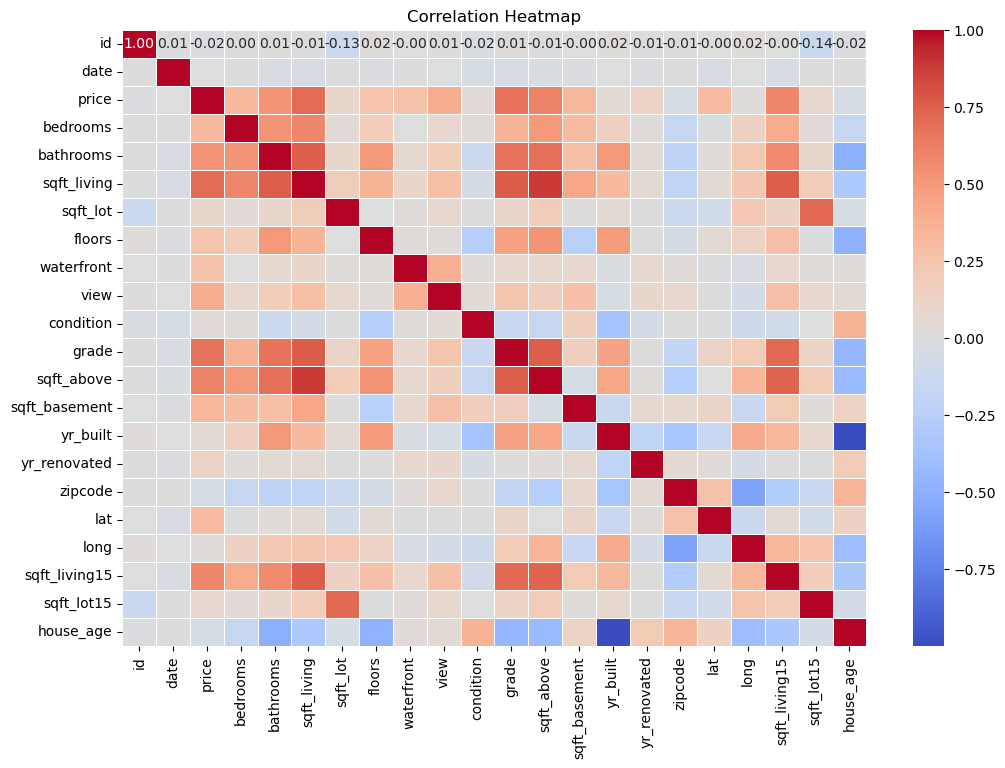

In [494]:
# sns.heatmap(df.corr(), cmap="coolwarm", annot=True)
# correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [495]:
df1 = df[['price', 'bathrooms', 'bedrooms', 'sqft_above', 'grade', 'sqft_living']]

In [496]:
df1.head()

,price,bathrooms,bedrooms,sqft_above,grade,sqft_living
0,221900.0,1.00,3,1180,7,1180
1,538000.0,2.25,3,2170,7,2570
2,180000.0,1.00,2,770,6,770
3,604000.0,3.00,4,1050,7,1960
4,510000.0,2.00,3,1680,8,1680


/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/madservices/opt/anaconda3/envs/learn-env/lib/python3.11/site-packages/seaborn/_oldcore.py:111

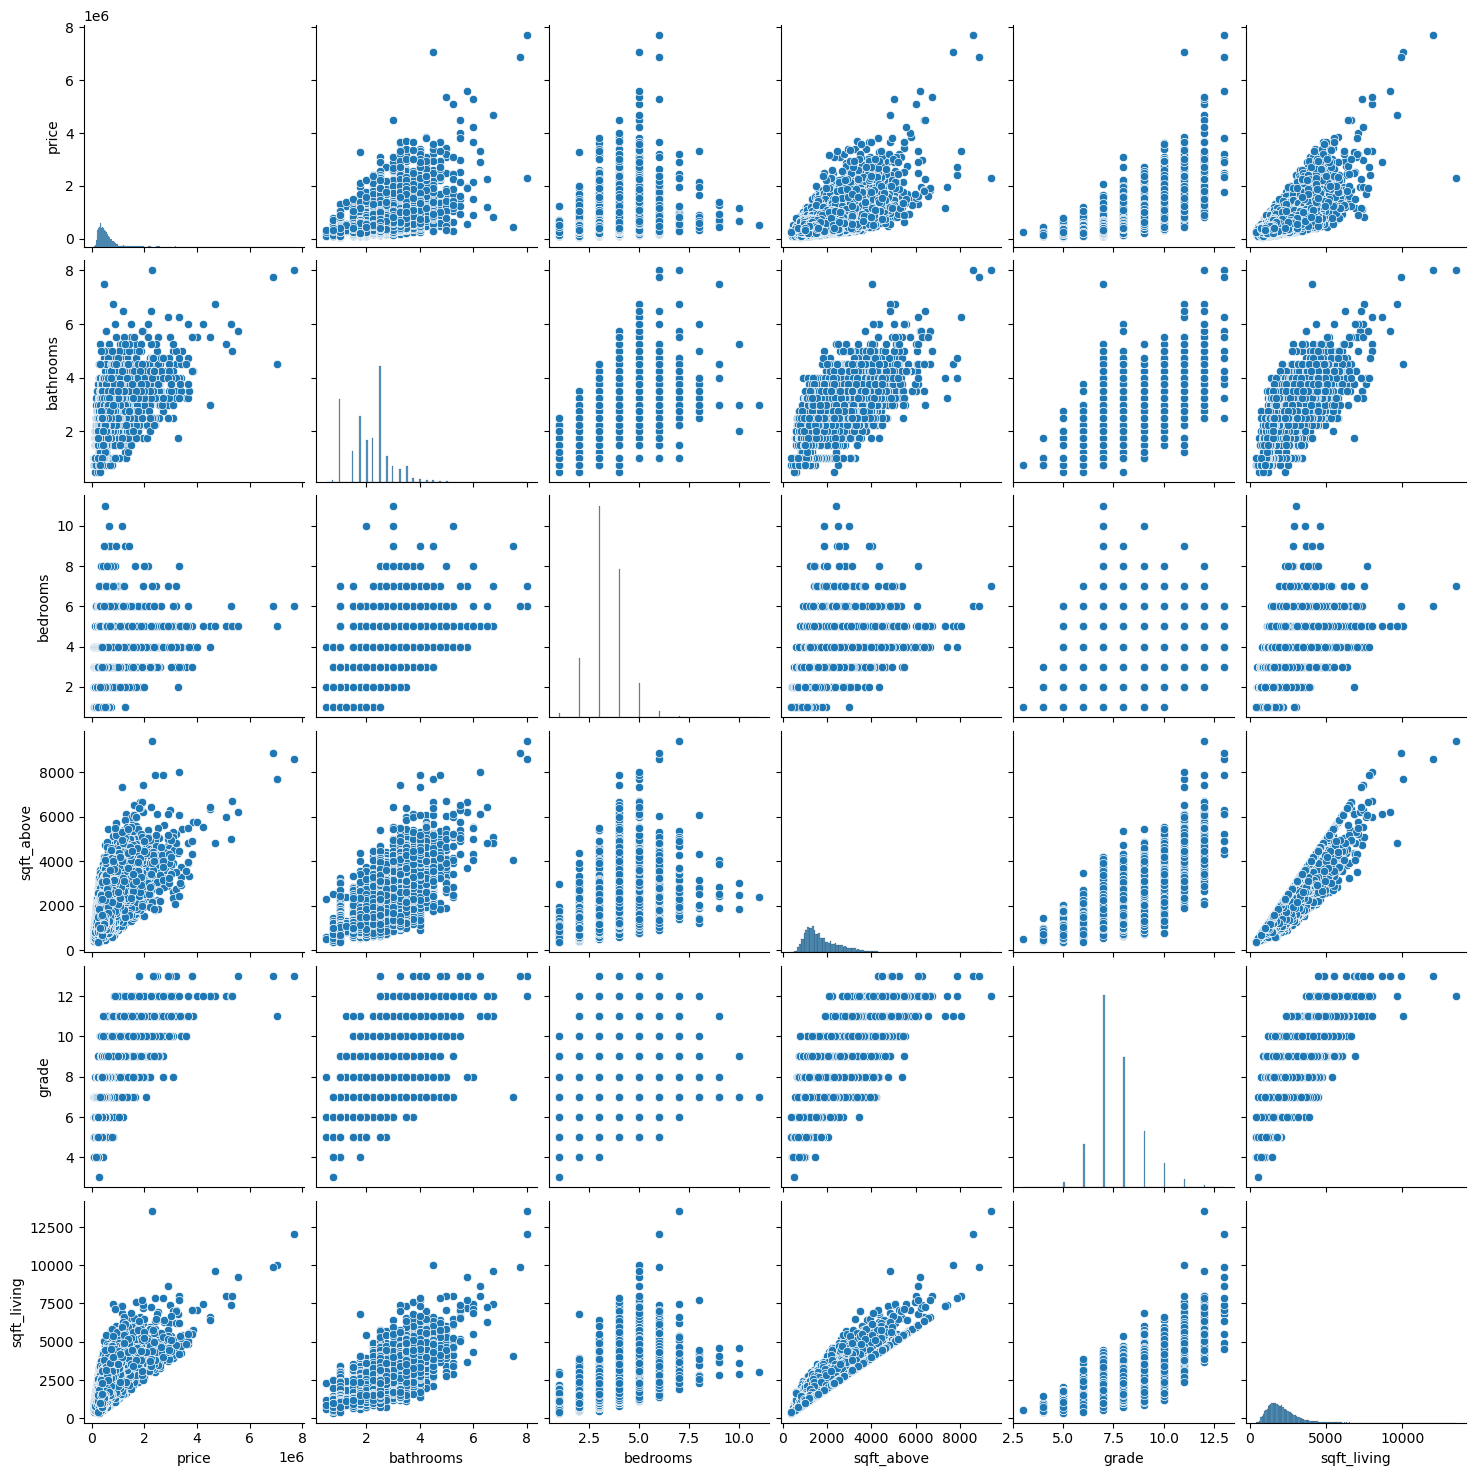

In [497]:
sns.pairplot(data = df1)

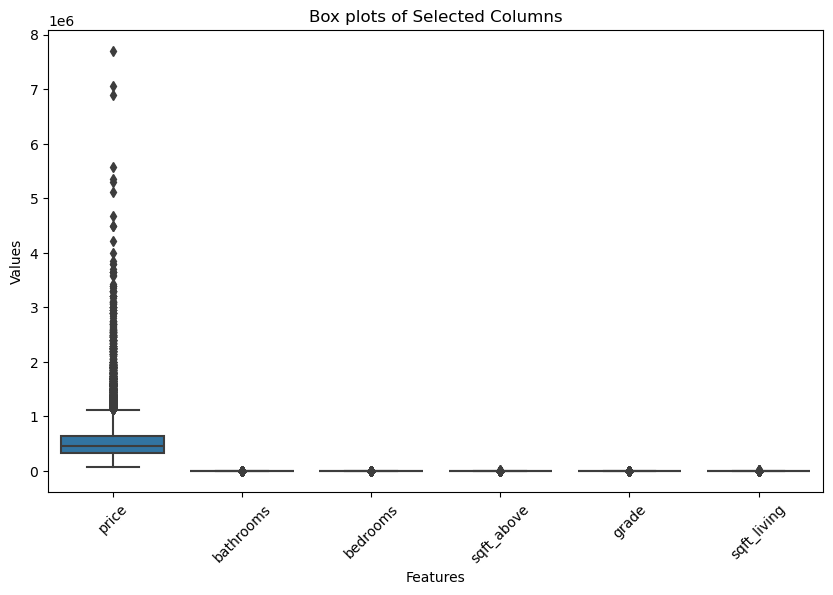

In [498]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df1)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [499]:
# # Calculate IQR for selected columns
# Q1 = df1.quantile(0.25)
# Q3 = df1.quantile(0.75)
# IQR = Q3 - Q1

# # Define outlier boundaries
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# # Find outliers
# outliers = ((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)

# # Print indices of outliers
# outlier_indices = df1.index[outliers]

# print(f'Number of outliers: {len(outlier_indices)}')

In [500]:
# droping all columns with outliers 
# df2 = df1.drop(outlier_indices)

In [501]:
df3 = df[['sqft_above', 'sqft_living']]

In [502]:
df4 = df[['bathrooms', 'bedrooms', 'grade']]

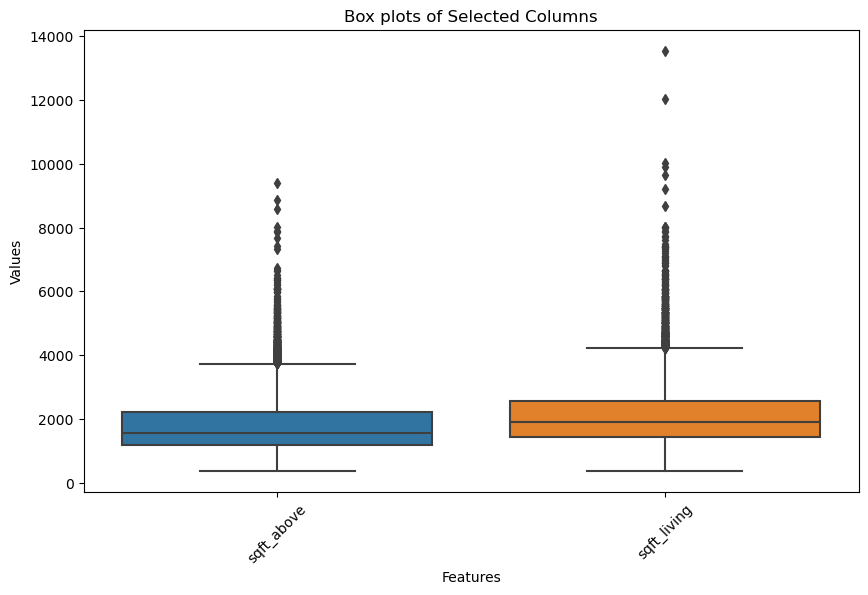

In [503]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df3)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

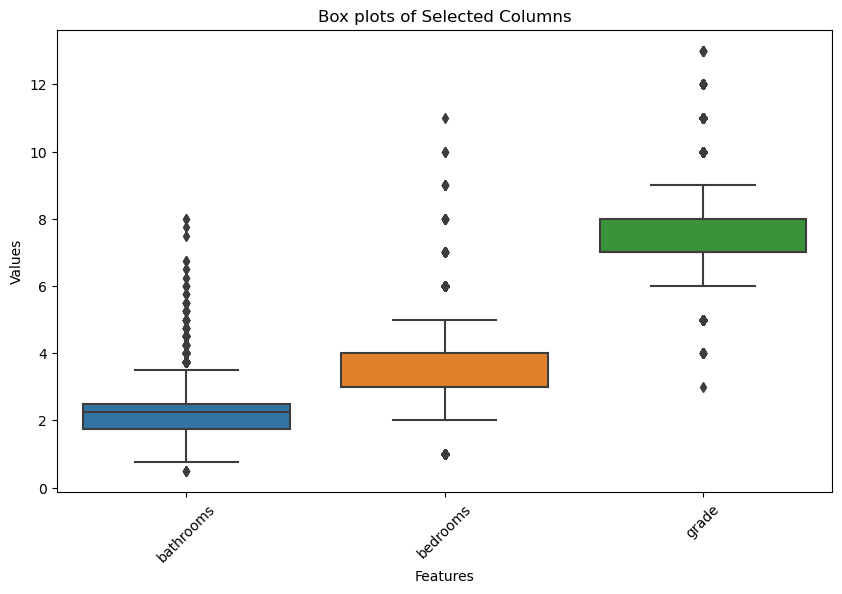

In [504]:
# Plotting box plots for each column
plt.figure(figsize=(10, 6))
sns.boxplot(data=df4)
plt.title('Box plots of Selected Columns')
plt.xlabel('Features')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

# Analysis 1

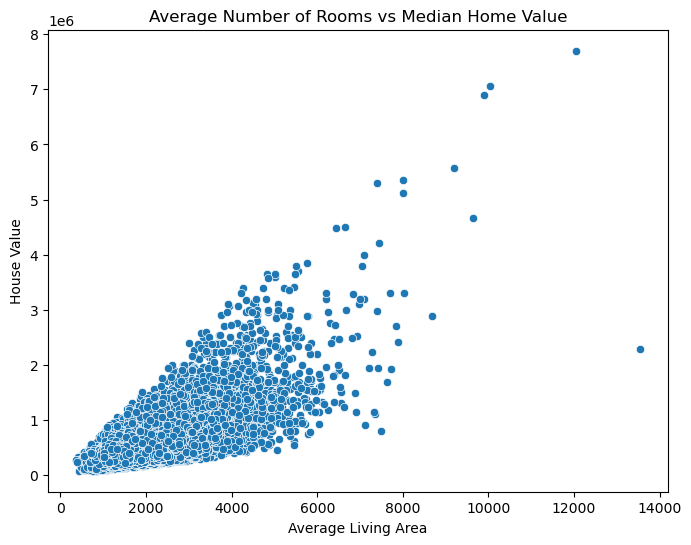

In [505]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sqft_living', y='price', data=df1)
plt.title('Average Number of Rooms vs Median Home Value')
plt.xlabel('Average Living Area')
plt.ylabel('House Value')
plt.show()

# Analysis 2

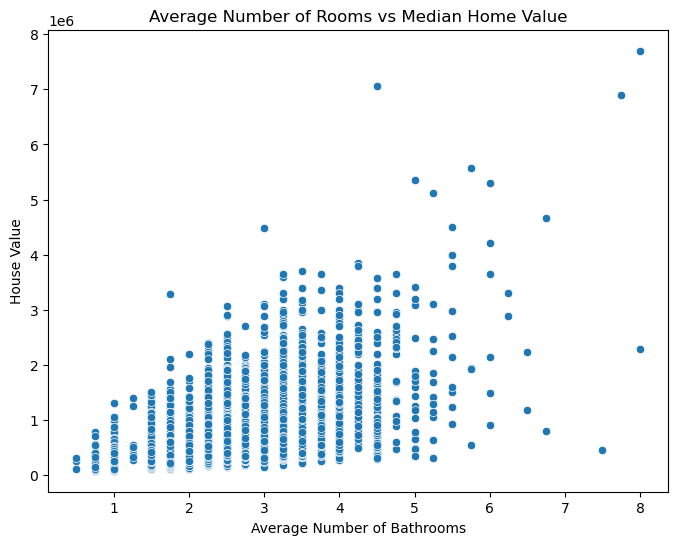

In [506]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='bathrooms', y='price', data=df1)
plt.title('Average Number of Rooms vs Median Home Value')
plt.xlabel('Average Number of Bathrooms')
plt.ylabel('House Value')
plt.show()

In [507]:
x = df[['sqft_living', 'grade', 'sqft_above']]
y = df['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [508]:
# Create a linear model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [509]:
# Prediction
y_pred = model.predict(X_test_scaled)

pred_df = pd.DataFrame({"true":y_test,"pred":y_pred})
pred_df.head()

,true,pred
3686,132500.0,160184.349645
10247,415000.0,295225.090537
4037,494000.0,449409.950930
3437,355000.0,340399.189623
19291,606000.0,394783.621308


In [510]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 61251115585.27808
Mean Absolute Error: 161354.69079577035
Root Mean Squared Error: 247489.6272276438
R-squared: 0.5324806709143306


In [511]:

X_1 = df['sqft_living']
X_2 = df['grade']
X_3 = df['sqft_above']

y = df['price']

multiple_formula = 'y ~ X_1 + X_2 + X_3'
multiple_model = ols(multiple_formula, df).fit()
multiple_model_summary = multiple_model.summary()

print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     8494.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:00:23   Log-Likelihood:            -2.9896e+05
No. Observations:               21596   AIC:                         5.979e+05
Df Residuals:                   21592   BIC:                         5.980e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.565e+05   1.36e+04    -48.300      0.0

In [512]:
correlation_matrix = df[['sqft_living', 'grade', 'sqft_above']].corr()
print(correlation_matrix)

             sqft_living     grade  sqft_above
sqft_living     1.000000  0.762776    0.876448
grade           0.762776  1.000000    0.756069
sqft_above      0.876448  0.756069    1.000000


From the code above it looks like there is multicollinearity between sqft_living and sqft_above.

# Model 2

In [515]:
x = df[['bedrooms', 'grade', 'sqft_above']]
y = df['price']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [516]:
# Create a linear model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train_scaled, y_train)

LinearRegression()

In [520]:
# Prediction
y_pred = model.predict(X_test_scaled)

pred_df = pd.DataFrame({"true":y_test,"pred":y_pred})
pred_df.head()

,true,pred
3686,132500.0,164347.641958
10247,415000.0,188606.594345
4037,494000.0,387962.756565
3437,355000.0,312103.410213
19291,606000.0,359363.449692


In [521]:
# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Calculate the Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 69565550033.04745
Mean Absolute Error: 172202.41446827358
Root Mean Squared Error: 263752.81995278737
R-squared: 0.4690180094165829


In [517]:

X_1 = df['bedrooms']
X_2 = df['grade']
X_3 = df['sqft_above']

y = df['price']

multiple_formula = 'y ~ X_1 + X_2 + X_3'
multiple_model = ols(multiple_formula, df).fit()
multiple_model_summary = multiple_model.summary()

print(multiple_model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                     6389.
Date:                Wed, 17 Jul 2024   Prob (F-statistic):               0.00
Time:                        23:01:15   Log-Likelihood:            -3.0052e+05
No. Observations:               21596   AIC:                         6.010e+05
Df Residuals:                   21592   BIC:                         6.011e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -8.503e+05   1.54e+04    -55.279      0.0

In [519]:
correlation_matrix = df[['bedrooms', 'grade', 'sqft_above']].corr()
print(correlation_matrix)

            bedrooms     grade  sqft_above
bedrooms    1.000000  0.366174    0.492543
grade       0.366174  1.000000    0.756069
sqft_above  0.492543  0.756069    1.000000


In [ ]:
# Check for duplicates
df1.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
21592    False
21593    False
21594    False
21595    False
21596    False
Length: 21596, dtype: bool

In [ ]:

print('Hello')

Hello
